In [1]:
from faker import Faker
import random
import pandas as pd

fake = Faker()

def generate_email_feedback():

    product_categories = ["Garden fence", "Chicken fence", "Highway fence", "Bird Fence", "Construction Wire"]  
    feedback = random.choice(["positive", "negative", "neutral"])
    
    if feedback == "positive":
        return_cust = 1
    elif feedback == "negative":
        return_cust = -1
    else:
        return_cust = 0
    
    product = random.choice(product_categories)

    if feedback == "positive":
        customer_return = random.choice([
        f"The {product} is outstanding! I am extremely satisfied with the {product}.",
        "Thanls for the service",
        f"I love the {product}! It exceeds my expectations.",
        "Top quality received, love it",
        f"The {product} is fantastic.",
        "Just five stars as always, happy about it",
        f"I appreciate the {product} and the exceptional service provided.",
        "Definitely going to order again, thanks",
        f"The {product} is top-notch, and the {product} exceeded my expectations.",
        f"Excellent {product} thanks my friend",
        f"I am thrilled with the {product}. It's truly remarkable, happy",
        f"The {product} is superb, and I commend the team for their efforts.",
        f"I'm delighted with the {product} and the overall experience.Thanks",
        f"The {product} is excellent, and I would highly recommend it. You are the best",
        f"I'm very impressed with the {product} and the level of service received.Thank you"
    ])
    elif feedback == "negative":
        customer_return = random.choice([
        f"I am disappointed with the {product}. It falls short in terms of {product}.",
        "Sorry, Its just bad quality"
        f"The {product} needs improvement, especially in terms of {product}.Quality not good",
        f"I encountered issues with the {product} that need urgent attention.",
        "Damaged here, asking refund",
        f"The {product} is below expectations, particularly in terms of low quality{product}.",
        f"I regret my purchase of the {product} due to {product} problems.",
        f"The {product} is not good, and I expected better quality.",
        f"I'm dissatisfied with the {product} and the overall experience. ",
        "Need replacement, dissatisfied"
        f"The {product} disappointed me, particularly in terms of {product}.Dont suit me at all",
        f"I'm not happy with the {product} and the level of service provided. I request a refund",
        f"The {product} didn't meet my expectations, and I'm dissatisfied. Very low quality",
        "Here is very bad",
        "I dont like it",
        "A lot of issues",
        f"I am frustrated with the {product}. It fails to meet expectations in terms of {product} quality.",
        f"This {product} is a disappointment. The quality is subpar.",
        f"The {product} is lacking, especially when it comes to its quality. Extremely dissatisfied.",
        f"Encountered severe issues with the {product}. Urgently need a resolution.",
        f"Received a damaged {product}. Requesting a refund immediately.",
        f"The {product} is far below expectations, particularly in terms of its poor quality.",
        f"Regretting my purchase of the {product}. Issues with {product} are unacceptable.",
        f"The {product} is not up to the mark. Expected much better quality.",
        f"Extremely dissatisfied with the {product} and the overall experience.",
        f"Need a replacement for the {product}. Highly dissatisfied with the purchase.",
        f"Unhappy with both the {product} and the service level. Requesting a refund.",
        f"Disappointed as the {product} did not meet expectations. Very poor quality.",
        f"The experience here is terrible. Issues with the {product} are unacceptable.",
        "Sorry . It doesn't appeal to my preferences.",
        f"Experiencing a lot of issues with the {product}. Dissatisfied."
        ])
    else:
        customer_return = random.choice( [
        f"I have no strong feelings about the {product}. It's just a {product}.",
        f"The {product} is okay; neither good nor bad.",
        f"I feel indifferent about the {product} and its features.",
        f"The {product} is average, and I don't have any strong opinions.",
        f"It's a standard {product}, and I don't have any particular praise or criticism.",
        f"I'm neutral about the {product} and its performance.",
        f"The {product} is neither impressive nor disappointing in my opinion.",
        f"I neither like nor dislike the {product}; it's just a {product}.",
        f"I'm indifferent to the {product} and its functionalities.",
        f"The {product} is neither exceptional nor subpar in my experience.",
        "Average quality, meets basic expectations.",
        "Fairly average, nothing special to highlight.",
        "Acceptable performance, but not exceptional.",
        "It's fine, but I expected a bit more.",
        "Okay product, meets basic requirements.",
        "Decent enough, but lacks a wow factor."
    ])

    response = {
            "type":"Email",
            "company":fake.company(),
            "ProductSpecifics": product,
            "email": fake.email(),
            "Return":customer_return,
            "Feedback": return_cust
    }

    return response


emails = [generate_email_feedback() for i in range(1000)]

df = pd.DataFrame(emails)

df.to_csv("fake_emails.csv", index=False)

df.head()


,type,company,ProductSpecifics,email,Return,Feedback
0,Email,Jones Inc,Bird Fence,qchavez@example.com,This Bird Fence is a disappointment. The quali...,-1
1,Email,Martin-Roberts,Chicken fence,jwallace@example.com,This Chicken fence is a disappointment. The qu...,-1
2,Email,"Schwartz, Stewart and Holt",Bird Fence,katkinson@example.com,Received a damaged Bird Fence. Requesting a re...,-1
3,Email,Soto PLC,Highway fence,christine66@example.com,I'm very impressed with the Highway fence and ...,1
4,Email,"Cummings, Barber and Williams",Bird Fence,downscindy@example.net,The Bird Fence is outstanding! I am extremely ...,1


In [2]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, accuracy_score

vectorizer = TfidfVectorizer(max_features=40)
X = vectorizer.fit_transform(df['Return'])
y = df['Feedback']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

classifier = LogisticRegression()
classifier.fit(X_train, y_train)

# Make predictions
y_pred = classifier.predict(X_test)

# Evaluate the model
accuracy = round(accuracy_score(y_test, y_pred),2)*100
print(f"Accuracy: {accuracy}%")

print("Classification Report:")
print(classification_report(y_test, y_pred))

Accuracy: 95.0%
Classification Report:
              precision    recall  f1-score   support

          -1       1.00      0.85      0.92       106
           0       0.95      1.00      0.98        98
           1       0.90      1.00      0.95        96

    accuracy                           0.95       300
   macro avg       0.95      0.95      0.95       300
weighted avg       0.95      0.95      0.95       300



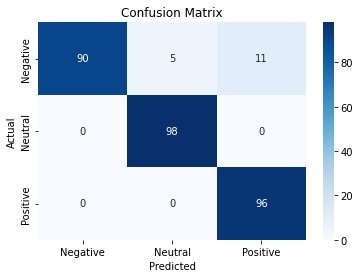

In [7]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(y_test, y_pred)

# Plot confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Neutral', 'Positive'], yticklabels=['Negative', 'Neutral', 'Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [10]:
from colorama import Fore, Style

new_emails = [
    "The fences are damaged and quality is not good. I request a full refund for that",
    "This is an average fence product. It could be cheaper",
    "I am satisfied with the quality. Thank you for the service"
]

for i, email in enumerate(new_emails, start=0):
    X = vectorizer.transform([email])
    prediction = classifier.predict(X)[0]
    
    print(new_emails[i]+ "- ", end="")
    
    if prediction == 1:
        print(Fore.GREEN + Style.BRIGHT + "Positive Comment" + Style.RESET_ALL)
    elif prediction == -1:
        print(Fore.RED + Style.BRIGHT + "Negative Comment" + Style.RESET_ALL)
    else:
        print(Fore.YELLOW + Style.BRIGHT + "Neutral Comment" + Style.RESET_ALL)


The fences are damaged and quality is not good. I request a full refund for that- Negative Comment
This is an average fence product. It could be cheaper- Neutral Comment
I am satisfied with the quality. Thank you for the service- Positive Comment
